In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Pacifist Game Jam Design Doc

### Name(s)
* Healing
* Wind & Rain
* Njǫrd (norse god of wind)

### Premise
You are the god of the wind [, and rain]. Reforest your tortured world. Try your best to abate disasters, and spread life across your lands

### Environment and Game Loop
The game begins with a desolate land devoid of life aside from a small oasis. Your goal is to spread life through solely the power of the wind **[and rain]**. The game is controlled from the first person perspective from a sort of 'flying' view. You can switch between controlling wind **[and rain]**.

Once plants mature they will produce seeds if the conditions are favorable. The seeds will be visible and can be 'blown' by the wind, released and carried. When airborn seeds intersect the ground, they will start growing.

Conflict will arise as randomly spawned wild fires. When a fire starts the player will be able to try to influence it, through their power **[to produce rain, and]** to direct the wind.

The player's magnitude of their powers, and frequency of naturally ocurring rainfall is directly related to the amount of plant life in the world. As a result the power of fires will scale to attempt to counter the player.

_square braces denote stretch goals_

### Player Scaling and Opposition Balance

In [16]:
# The following function models the number of individual plants as a function of the radius that the player has populated
def plants(r):
    density = 1
    return density * np.pi * pow(r, 2)

In [17]:
# In the game, the players power will be a function of the number of plants.
def power(r):
    some_scaling_factor = 1
    return plants(r) * some_scaling_factor

In [75]:
# The power of spawning wild fires will lag the player's power.
def wildfire_power(last_fire_p, last_fire_i, player_p):
    p = 0.5
    i = 0.9
    d = 0.75
    
    delta = player_p - last_fire_p
    last_fire_i += delta
    
    # implement the wildfire's power as a PID controller
    return p * player_p + i * last_fire_i + d * delta, last_fire_i

In [76]:
def sim(rs):
    powers = [power(plants(r)) for r in rs]
    wildfire_powers = []
    last_fire_p = 0
    last_fire_p_i = 0
    for p in powers:
        wildfire_powers += [last_fire_p]
        last_fire_p, last_fire_p_i = wildfire_power(last_fire_p, last_fire_p_i, p)
        
    return powers, wildfire_powers

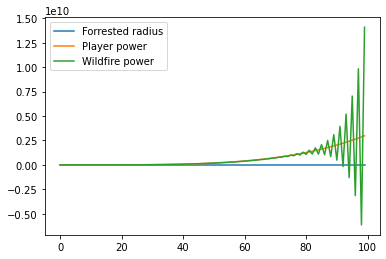

In [77]:
powers, wildfire_powers = sim([r for r in range(100)])

plt.plot(rs, label='Forrested radius')
plt.plot(powers, label='Player power')
plt.plot(wildfire_powers, label='Wildfire power')
plt.legend()
plt.show()

The power of fires will always be closely behind the heels of the player. Lets see what it looks like if the player's power grows but ocsillates.

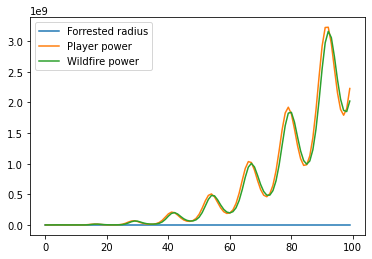

In [65]:
powers, wildfire_powers = sim([max(0, t + 10 * np.sin(t * 0.5)) for t in range(100)])

plt.plot(rs, label='Forrested radius')
plt.plot(powers, label='Player power')
plt.plot(wildfire_powers, label='Wildfire power')
plt.legend()
plt.show()

Simulate for a fixed period of time to see what happens

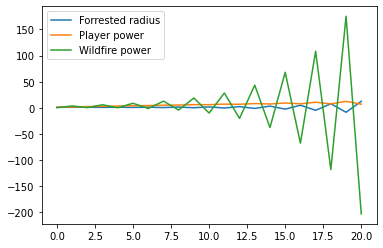

In [91]:
def dx(fn, x, h):
    return (fn(x + h) - fn(x - h)) / (2 * h)

forrest_rs = [1]
fire_ps = [0]
fire_i = 0
player_ps = [1]

dt = 0.1
for t in range(20):
    player_ps += [player_ps[-1] + dx(power, forrest_rs[-1], 0.1) * dt]
#     forrest_rs += [forrest_rs[-1] + player_ps[-1] * dt] # TODO: probably isn't close to realistic
    fire_p, fire_i = wildfire_power(fire_ps[-1], fire_i, player_ps[-1])
    fire_ps += [fire_p]
    forrest_rs += [forrest_rs[-1] + player_ps[-1] * dt - fire_p * dt]
    
plt.plot(forrest_rs, label='Forrested radius')
plt.plot(player_ps, label='Player power')
plt.plot(fire_ps, label='Wildfire power')
plt.legend()
plt.show()

The previous attempts don't really seem to be going in the direction that I'm looking for. Lets try modeling this differently, as a series of differential equations.

In [ ]:
def d_forrest_a()

### Controls

When controlling the wind, the player's camera moves quickly as a wind gust itself. When controlling the rain, the player moves much slower, and is forced to fly at a higher elevation as a cloud. Whenever you're not directly controlling the wind or rain, the behavior of each is random.